
Sakar dataset -755 datapoints 
VGG16

15 epoch

batch size 32
lr=0.0001

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Lenovo/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:42<00:00, 13.1M

Epoch 1/15, Training Loss: 0.6043, Training Accuracy: 0.7202, Validation Loss: 0.6048, Validation Accuracy: 0.7303
Epoch 2/15, Training Loss: 0.5886, Training Accuracy: 0.7483, Validation Loss: 0.5874, Validation Accuracy: 0.7303
Epoch 3/15, Training Loss: 0.5843, Training Accuracy: 0.7517, Validation Loss: 0.5870, Validation Accuracy: 0.7303
Epoch 4/15, Training Loss: 0.5664, Training Accuracy: 0.7500, Validation Loss: 0.5862, Validation Accuracy: 0.7303
Epoch 5/15, Training Loss: 0.5686, Training Accuracy: 0.7500, Validation Loss: 0.5887, Validation Accuracy: 0.7303
Epoch 6/15, Training Loss: 0.5788, Training Accuracy: 0.7483, Validation Loss: 0.5849, Validation Accuracy: 0.7303
Epoch 7/15, Training Loss: 0.5743, Training Accuracy: 0.7467, Validation Loss: 0.5856, Validation Accuracy: 0.7303
Epoch 8/15, Training Loss: 0.5865, Training Accuracy: 0.7517, Validation Loss: 0.5836, Validation Accuracy: 0.7303
Epoch 9/15, Training Loss: 0.5813, Training Accuracy: 0.7434, Validation Loss: 0

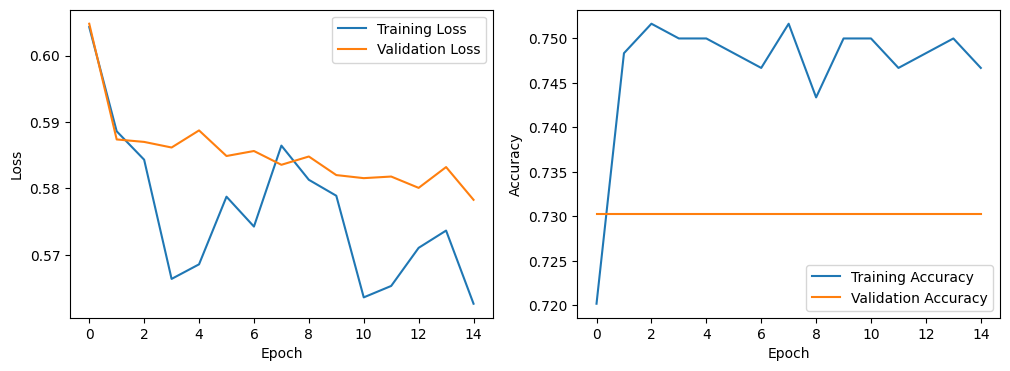

Final Training Accuracy: 0.7467
Final Validation Accuracy: 0.7303
Number of Train Data Points: 604
Confusion Matrix:
[[  0  41]
 [  0 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.73      1.00      0.84       111

    accuracy                           0.73       152
   macro avg       0.37      0.50      0.42       152
weighted avg       0.53      0.73      0.62       152

Sensitivity: 1.0000
Specificity: 0.0000
Confusion matrix, without normalization
[[  0  41]
 [  0 111]]


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

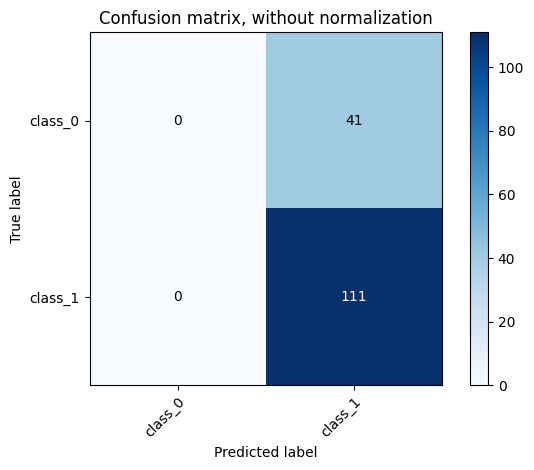

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.models as models

# Define VGG16 model
model = models.vgg16(pretrained=True)

# Freeze model parameters
for param in model.parameters():
    param.requires_grad = False

# Modify the last fully connected layer for binary classification
num_classes = 2  # Adjust according to your number of classes
model.classifier[6] = nn.Linear(4096, num_classes)

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plot_roc_curve(y_true, y_pred_probs):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def train_and_evaluate(data_path, split_ratio=0.8, num_epochs=15, batch_size=32, learning_rate=0.0001):#lr=0.0001
    # Image dimensions
    height, width = 224, 224  # VGG16 expects input size (224, 224)

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((height, width)),
        transforms.ToTensor(),
    ])

    # Create dataset
    dataset = ImageFolder(root=data_path, transform=transform)

    # Split dataset into training and validation sets
    total_size = len(dataset)
    train_size = int(split_ratio * total_size)
    val_size = total_size - train_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store the learning curve data
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        average_train_loss = running_loss / len(train_loader)
        train_losses.append(average_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct_val = 0
        total_val = 0
        val_running_loss = 0.0
        y_true = []
        y_pred = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                val_running_loss += criterion(outputs, labels).item()
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(predicted.cpu().numpy())

        val_loss = val_running_loss / len(val_loader)
        val_losses.append(val_loss)
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Print training loss and validation accuracy
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {average_train_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.4f}, '
              f'Validation Loss: {val_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')

    # Plot the learning curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Print final training and validation accuracy
    print(f'Final Training Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Final Validation Accuracy: {val_accuracies[-1]:.4f}')

    # Print number of test and train data points
    print(f'Number of Train Data Points: {len(train_dataset)}')

    # Evaluation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # Calculate and print specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, classes=['class_0', 'class_1'])

    # Plot ROC curve and calculate AUC
    y_pred_probs = torch.softmax(torch.tensor(y_pred), 1)[:, 1].cpu().numpy()  # Probability for class 1 (positive)
    plot_roc_curve(y_true, y_pred_probs)

# Example usage
data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Sakar pd speech time series converted\Normalised\spectrogram"
train_and_evaluate(data_path)



Sakar dataset -755 datapoints 
VGG16

15 epoch

batch size 32
lr=0.000

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/15, Training Loss: 0.6230, Training Accuracy: 0.7053, Validation Loss: 0.5162, Validation Accuracy: 0.7895
Epoch 2/15, Training Loss: 0.6076, Training Accuracy: 0.7202, Validation Loss: 0.5383, Validation Accuracy: 0.7895
Epoch 3/15, Training Loss: 0.5902, Training Accuracy: 0.7285, Validation Loss: 0.5183, Validation Accuracy: 0.7895
Epoch 4/15, Training Loss: 0.5757, Training Accuracy: 0.7368, Validation Loss: 0.5264, Validation Accuracy: 0.7895
Epoch 5/15, Training Loss: 0.5965, Training Accuracy: 0.7219, Validation Loss: 0.5199, Validation Accuracy: 0.7895
Epoch 6/15, Training Loss: 0.6053, Training Accuracy: 0.7351, Validation Loss: 0.5248, Validation Accuracy: 0.7895
Epoch 7/15, Training Loss: 0.5958, Training Accuracy: 0.7202, Validation Loss: 0.5237, Validation Accuracy: 0.7895
Epoch 8/15, Training Loss: 0.5910, Training Accuracy: 0.7301, Validation Loss: 0.5159, Validation Accuracy: 0.7895
Epoch 9/15, Training Loss: 0.5884, Training Accuracy: 0.7368, Validation Loss: 0

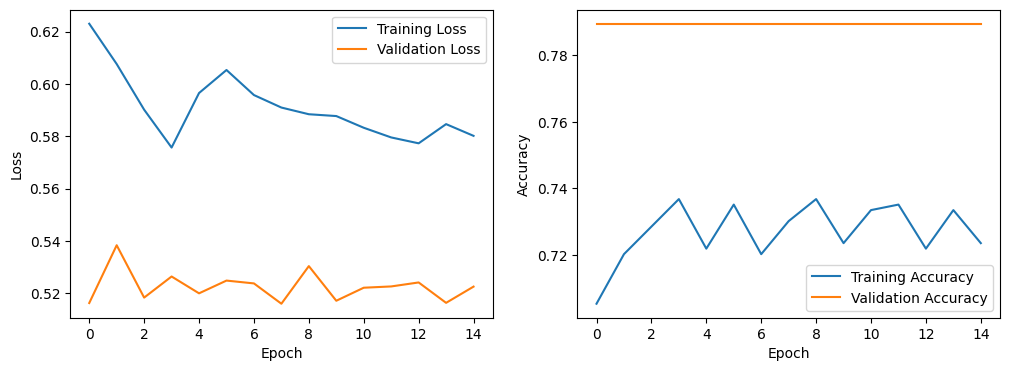

Final Training Accuracy: 0.7235
Final Validation Accuracy: 0.7895


AttributeError: 'Subset' object has no attribute 'targets'

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.models as models

# Define VGG16 model
model = models.vgg16(pretrained=True)

# Freeze model parameters
for param in model.parameters():
    param.requires_grad = False

# Modify the last fully connected layer for binary classification
num_classes = 2  # Adjust according to your number of classes
model.classifier[6] = nn.Linear(4096, num_classes)

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plot_roc_curve(y_true, y_pred_probs):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def train_and_evaluate(data_path, split_ratio=0.8, num_epochs=15, batch_size=32, learning_rate=0.0001):
    # Image dimensions
    height, width = 224, 224  # VGG16 expects input size (224, 224)

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((height, width)),
        transforms.ToTensor(),
    ])

    # Create dataset
    dataset = ImageFolder(root=data_path, transform=transform)

    # Split dataset into training and validation sets
    total_size = len(dataset)
    train_size = int(split_ratio * total_size)
    val_size = total_size - train_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store the learning curve data
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        average_train_loss = running_loss / len(train_loader)
        train_losses.append(average_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct_val = 0
        total_val = 0
        val_running_loss = 0.0
        y_true = []
        y_pred = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                val_running_loss += criterion(outputs, labels).item()
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(predicted.cpu().numpy())

        val_loss = val_running_loss / len(val_loader)
        val_losses.append(val_loss)
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Print training loss and validation accuracy
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {average_train_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.4f}, '
              f'Validation Loss: {val_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')

    # Plot the learning curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Print final training and validation accuracy
    print(f'Final Training Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Final Validation Accuracy: {val_accuracies[-1]:.4f}')

    # Print number of train and test data points
    print(f'Number of Train Data Points (PD): {sum(np.array(train_dataset.targets) == 0)}')
    print(f'Number of Train Data Points (HC): {sum(np.array(train_dataset.targets) == 1)}')
    print(f'Number of Test Data Points (PD): {sum(np.array(val_dataset.targets) == 0)}')
    print(f'Number of Test Data Points (HC): {sum(np.array(val_dataset.targets) == 1)}')
    print(f'Total Number of Training Data Points: {len(train_dataset)}')
    print(f'Total Number of Testing Data Points: {len(val_dataset)}')

    # Evaluation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # Calculate and print specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # Print predicted and true labels
    print("Predicted Class Values:", y_pred)
    print("True Class Values:", y_true)

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, classes=['PD', 'HC'])

    # Plot ROC curve and calculate AUC
    y_pred_probs = torch.softmax(torch.tensor(y_pred), 1)[:, 1].cpu().numpy()  # Probability for class 1 (positive)
    plot_roc_curve(y_true, y_pred_probs)

# Example usage
data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Sakar pd speech time series converted\Normalised\spectrogram"
train_and_evaluate(data_path)


sakar dataset -755 data point
15 epoch
batch size 32
lr=0.001

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/15, Training Loss: 1.2427, Training Accuracy: 0.6871, Validation Accuracy: 0.7895
Epoch 2/15, Training Loss: 0.5990, Training Accuracy: 0.7351, Validation Accuracy: 0.7895
Epoch 3/15, Training Loss: 0.6378, Training Accuracy: 0.6937, Validation Accuracy: 0.7895
Epoch 4/15, Training Loss: 0.5817, Training Accuracy: 0.7268, Validation Accuracy: 0.7895
Epoch 5/15, Training Loss: 0.9767, Training Accuracy: 0.7185, Validation Accuracy: 0.7895
Epoch 6/15, Training Loss: 0.5828, Training Accuracy: 0.7351, Validation Accuracy: 0.7895
Epoch 7/15, Training Loss: 0.5822, Training Accuracy: 0.7351, Validation Accuracy: 0.7895
Epoch 8/15, Training Loss: 0.5888, Training Accuracy: 0.7351, Validation Accuracy: 0.7895
Epoch 9/15, Training Loss: 0.5862, Training Accuracy: 0.7351, Validation Accuracy: 0.7895
Epoch 10/15, Training Loss: 0.5820, Training Accuracy: 0.7351, Validation Accuracy: 0.7895
Epoch 11/15, Training Loss: 0.5818, Training Accuracy: 0.7351, Validation Accuracy: 0.7895
Epoch 12

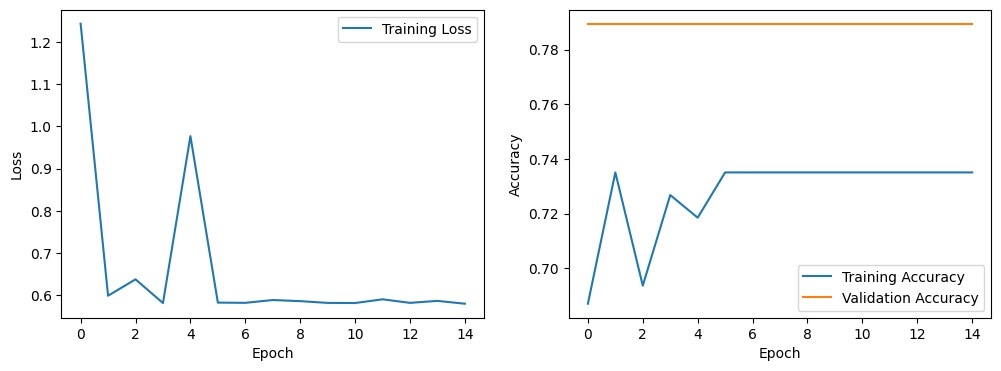

Final Training Accuracy: 0.7351
Final Validation Accuracy: 0.7895
Predicted Class Values: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
True Class Values: [1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.79      1.00      0.88       120

    accuracy                           0.79       152
   macro avg       0.39      0.50      0.44       152

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

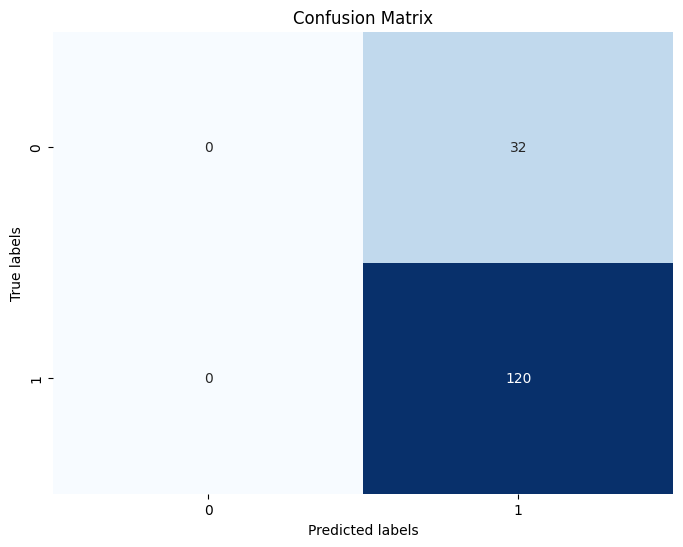

Sensitivity: 1.0000
Specificity: 0.0000


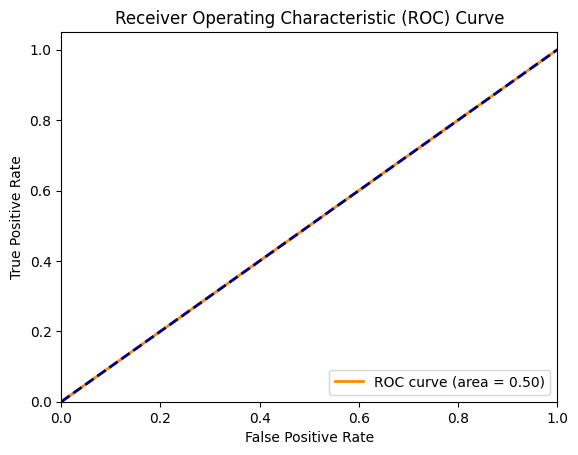

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import vgg16
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_pred_probs):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def train_and_evaluate(data_path, split_ratio=0.8, num_epochs=15):
    # Image dimensions
    height, width = 224, 224  # VGG16 expects input size (224, 224)

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((height, width)),
        transforms.ToTensor(),
    ])

    # Create dataset
    dataset = ImageFolder(root=data_path, transform=transform)

    # Split dataset into training and validation sets
    total_size = len(dataset)
    train_size = int(split_ratio * total_size)
    val_size = total_size - train_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Create loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Load pre-trained VGG16 model
    model = vgg16(pretrained=True)
    
    # Modify the last fully connected layer for binary classification
    in_features = model.classifier[-1].in_features
    model.classifier[-1] = nn.Linear(in_features, 2)

    model.train()

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Lists to store the learning curve data
    train_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        average_train_loss = running_loss / len(train_loader)
        train_losses.append(average_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct_val = 0
        total_val = 0
        y_pred_probs = []
        y_true = []
        y_pred = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                y_true.extend(labels.numpy())
                y_pred.extend(predicted.numpy())
                y_pred_probs.extend(torch.softmax(outputs, 1)[:, 1].tolist())  # Probability for class 1 (positive)

        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Print training loss and validation accuracy
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {average_train_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')

    # Plot the learning curve
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Print final training and validation accuracy
    print(f'Final Training Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Final Validation Accuracy: {val_accuracies[-1]:.4f}')

    # Evaluation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_probs = np.array(y_pred_probs)

    # Print predicted class values and true class values
    print("Predicted Class Values:", y_pred)
    print("True Class Values:", y_true)

    # Print confusion matrix and classification report
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred)

    # Calculate and print specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # Plot ROC curve and calculate AUC
    plot_roc_curve(y_true, y_pred_probs)

# Example usage
data_path = r"C:\Users\Lenovo\Downloads\PD AUDIO DATA\Sakar pd speech time series converted\Normalised\spectrogram"
train_and_evaluate(data_path, num_epochs=15)
